<a href="https://www.kaggle.com/code/architty108/number-of-apps-predictor?scriptVersionId=202998691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Number of Apps Predictor**

### **Model Accuracy: 95.6%**

In [238]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


Importing data

In [239]:
df = pd.read_csv(r"/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

## Understanding Data

In [240]:
df.sample(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
59,60,iPhone 12,iOS,325,7.1,2269,64,1053,56,Male,4
61,62,Xiaomi Mi 11,Android,309,7.5,2292,77,1253,57,Female,4
346,347,OnePlus 9,Android,156,3.3,1020,38,447,57,Female,2


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [242]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

<Axes: xlabel='Operating System', ylabel='count'>

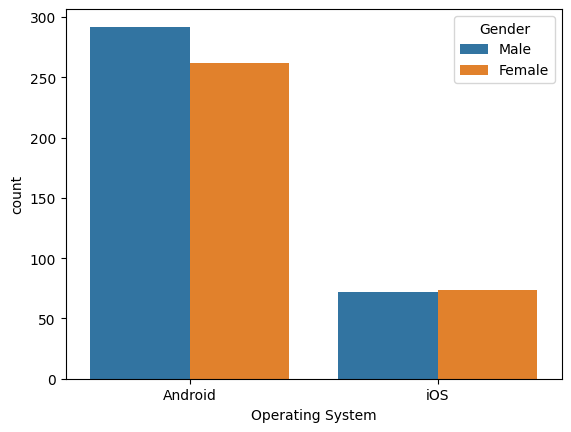

In [243]:
sns.countplot(df, x='Operating System', hue='Gender')

In [244]:
df.groupby(by='Gender').agg({'Number of Apps Installed':['mean','count']})

Number of Apps Installed      
                           mean count
Gender                               
Female                50.226190   336
Male                  51.101648   364

## Data cleaning

Dropping unusable features(columns)

In [245]:
df.drop(columns=['User ID','Device Model','Age','User Behavior Class','Gender'], inplace=True)

# Preparaing Data for ML Algorithm

Appling Label Encoding on feature `Operating System`

In [246]:
lbl = LabelEncoder()
df['Operating System'] = lbl.fit_transform(df['Operating System'])

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Operating System            700 non-null    int64  
 1   App Usage Time (min/day)    700 non-null    int64  
 2   Screen On Time (hours/day)  700 non-null    float64
 3   Battery Drain (mAh/day)     700 non-null    int64  
 4   Number of Apps Installed    700 non-null    int64  
 5   Data Usage (MB/day)         700 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 32.9 KB


Splitting Data features for Input as well as Target

In [248]:
target_feature = "Number of Apps Installed"
X = df.drop(columns=[target_feature])
y = df[[target_feature]]

Train-Test split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

***
# Model working stars from here

## **KNN Regressor**

In [251]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_score(y_test, y_pred)

0.9225881069889434

## **Linear Regression**

In [252]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_score(y_test, y_pred_lr)

0.9342542726601643

## **ElasticNet Regession**

In [253]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
r2_score(y_test, y_pred_elastic)

0.9354150741282109

## **Decision Tree**

In [254]:
dtree = DecisionTreeRegressor(ccp_alpha=10)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
r2_score(y_test, y_pred_dtree)

0.9545125766667281

## **Random Forest**

In [255]:
rf = RandomForestRegressor(n_estimators=50, ccp_alpha=15)
rf.fit(X_train, y_train.to_numpy().ravel())
y_pred_rf = rf.predict(X_test)
r2_score(y_test, y_pred_rf)

0.9571420275322711

***
# **Voting Ensemble Learning**

### With Pre-trained models

In [256]:
voting_model_1 = VotingRegressor(estimators=[
    ('Linear Regressor 93.42%', LinearRegression()),
    ('ElasticNet Regressor 93.54%', ElasticNet()),
    ('Decision Tree 95.71%', dtree),
    ('Random Forest 95.57', rf)
])

voting_model_2 = VotingRegressor(estimators=[
    ('Decision Tree 95.71%', dtree),
    ('Random Forest 95.57', rf)
])

#### Voting Model 1 Training and Prediction

In [257]:
voting_model_1.fit(X_train, y_train)
y_pred_vm1 = voting_model_1.predict(X_test)
r2_score(y_test, y_pred_vm1)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9509863619583848

#### Voting Model 2 Training and Prediction

In [258]:
voting_model_2.fit(X_train, y_train)
y_pred_vm2 = voting_model_2.predict(X_test)
r2_score(y_test, y_pred_vm2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9572698236709138

In [259]:
major_model = VotingRegressor(estimators = [
    ('V1', voting_model_1),
    ('v2', voting_model_2),
    ('v3', rf)
])

In [260]:
major_model.fit(X_train, y_train)
y_pred_major_model = major_model.predict(X_test)
major_model_accuracy = round(r2_score(y_test, y_pred_major_model)*100,2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
major_model_accuracy

95.61

# Final Model Structure

In [262]:
major_model

VotingRegressor(estimators=[('V1',
                             VotingRegressor(estimators=[('Linear Regressor '
                                                          '93.42%',
                                                          LinearRegression()),
                                                         ('ElasticNet '
                                                          'Regressor 93.54%',
                                                          ElasticNet()),
                                                         ('Decision Tree '
                                                          '95.71%',
                                                          DecisionTreeRegressor(ccp_alpha=10)),
                                                         ('Random Forest 95.57',
                                                          RandomForestRegressor(ccp_alpha=15,
                                                                                n_estimators=50))])),
                            ('v2',
                             VotingRegressor(estimators=[('Decision Tree '
                                                          '95.71%',
                                                          DecisionTreeRegressor(ccp_alpha=10)),
                                                         ('Random Forest 95.57',
                                                          RandomForestRegressor(ccp_alpha=15,
                                                                                n_estimators=50))])),
                            ('v3',
                             RandomForestRegressor(ccp_alpha=15,
                                                   n_estimators=50))])

# Conclusion

- Finally our model reach **95.6%** accuracy
- We train many model of different algorithms
- Thanks :)